<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW7/ClusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
import seaborn as sns
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_genes = pd.read_csv("https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW7/kidpackgenes.csv", index_col=0)
df_genes= df_genes.reset_index(drop=True)
df_genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [3]:
df_genes.shape

(2603, 74)

In [4]:
df_genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,-0.074268,-0.005045,0.005219,-0.079438,-0.042794,0.015155,-0.059323,-0.039752,-0.087955,0.000902,-0.041196,-0.015011,-0.034671,-0.112678,-0.048054,-0.012752,-0.002154,-0.023367,-0.008875,-0.043155,-0.010581,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,0.493931,0.346347,0.331848,0.692972,0.428889,0.339398,0.380021,0.351449,0.455828,0.345493,0.362652,0.447326,0.540023,0.580710,0.496429,0.543310,0.465740,0.387973,0.397993,0.425933,0.403002,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,-0.378801,-0.212649,-0.179065,-0.506899,-0.275926,-0.144605,-0.309324,-0.234284,-0.332753,-0.210667,-0.261666,-0.280333,-0.321668,-0.392210,-0.350457,-0.324113,-0.252442,-0.238936,-0.230974,-0.293005,-0.216682,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,-0.238644,-0.206238,-0.265784,-0.261281,-0.256625,-0.422915,-0.212

# Check missing values

In [5]:
df_genes.isnull().values.any()

True

In [6]:
print("There are {} missing values in the entire dataframe".format(df_genes.isnull().sum().sum()))


There are 53 missing values in the entire dataframe


## Remove all the rows containing missing values

In [7]:
 df = df_genes.dropna(axis=0)
 df.shape

(2602, 74)

## Selecting five random columns from the dataframe and plot their distributions and pairwise correlation

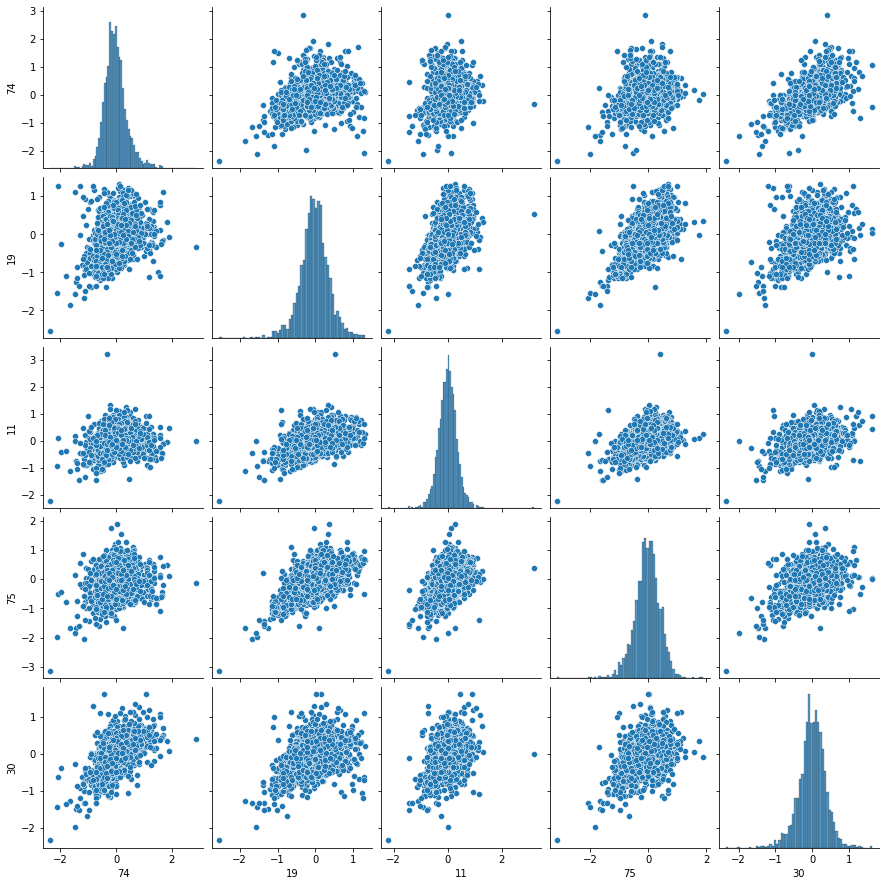

In [8]:
np.random.seed(5)
cols = df.columns[np.random.randint(1,74,5)]
sns.pairplot(df[cols])

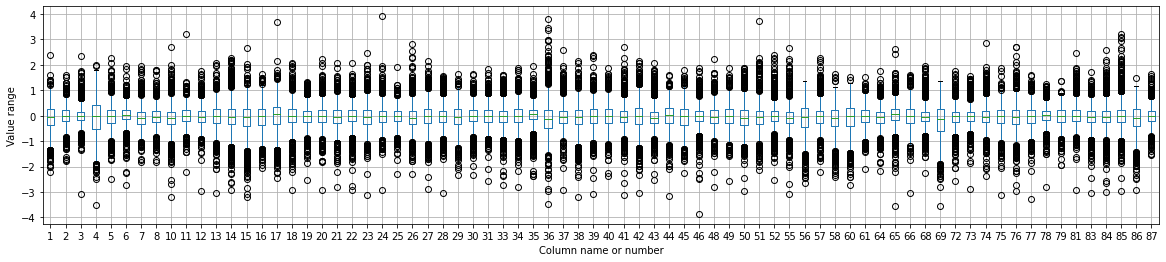

In [9]:
fig,axes = plt.subplots(figsize=(20,4))
df.boxplot(ax=axes);
axes.set_xlabel('Column name or number')
axes.set_ylabel('Value range');

In [10]:
scaledgenes = pd.DataFrame(skl.preprocessing.scale(df, axis=0))
scaledgenes.mean(0).to_numpy().round(2), scaledgenes.std(0).to_numpy().round(2)

(array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,
         0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,
         0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
         0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
        -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [11]:
scaledgenes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,-0.146019,-1.488856,0.514638,-0.353014,0.502572,0.029563,0.222502,0.604333,0.647998,0.075182,1.136687,0.907956,-0.127309,0.367495,-0.660243,0.534738,-0.276161,0.034742,-0.980446,-0.197406,0.609548,1.494984,0.115342,-0.097776,0.834808,1.425107,1.571905,-0.054503,0.299091,0.348216,1.390682,0.284985,0.501318,0.856694,-0.853848,0.161556,0.950363,-0.353100,-0.008300,-0.099195,1.091593,0.541688,-0.251869,0.967078,0.549274,0.234840,2.707725,-0.148490,0.059847,0.877376,0.023328,0.275269,0.358016,-0.277437,-0.337881,-0.092524,0.956724,0.783125,0.484408,-0.576192,0.126103,0.037952,0.444157,-0.211445,0.576660,-0.776721,-0.001318,-0.672957,0.202170,0.440209,0.045815,1.098020,0.436797,1.006906
1,-0.792728,0.464332,0.666898,-0.676048,0.195739,0.359141,0.427133,0.016276,1.292408,0.013869,1.202594,1.095210,0.055175,1.621696,-0.827387,0.027786,-0.505117,-0.289729,-1.158889,0.309853,-0.070339,1.428788,0.544404,-0.201160,1.240637,1.555996,2.044202,-0.508714,0.695053,-0.286004,0.170844,0.370791,0.487009,0.737470,-0.161089,0.446022,1.310643,-0.344948,0.516954,0.200795,1.657301,-0.017265,0.381959,1.143808,1.090641,0.120314,1.881579,-0.815878,0.153995,0.433791,-0.615950,0.081879,-0.234432,-1.120606,-0.312187,-0.542851,0.002609,1.110759,0.298254,-0.722362,0.043553,0.318469,-0.242917,-0.819484,0.846758,-1.021731,-0.420254,-0.644995,0.350828,0.073335,0.608766,0.923101,-0.749670,0.630622
2,-0.029854,-0.586855,-0.470565,-0.301764,-0.892364,0.311979,-0.100687,0.092237,0.916678,-0.646321,0.398565,0.209992,-0.259801,0.305572,-0.394290,-0.043692,-1.747101,-0.182220,-1.954691,-1.065694,-0.498056,0.655872,0.497126,-0.348993,-0.032556,0.983376,0.692545,0.268341,1.218127,-0.958493,-0.263409,-1.167418,0.474370,-0.031375,-1.650354,-1.340592,0.010389,-0.007276,-0.945628,-0.449924,0.179561,0.437077,0.774829,-0.135723,0.812693,-0.318086,1.081257,-0.815935,0.472055,0.667890,0.012390,-0.314736,0.303127,-0.074875,-0.016122,0.099233,0.208290,1.111159,0.205389,-1.414642,0.343176,-0.418678,-0.480002,0.389655,0.048375,-1.049329,-0.155712,-0.412715,0.133189,0.080352,-0.194740,-0.420867,-0.565212,-0.063473
3,-0.513189,-4.937272,0.191776,-0.128601,-0.999641,0.777537,-0.002835,-0.519828,1.637398,0.373869,1.581952,-0.210795,-0.266839,0.206770,-0.590421,-1.084528,-0.510219,0.852890,-0.642572,-0.144977,1.484118,0.590947,-0.848305,0.273840,0.316052,1.173312,0.770137,1.133725,0.310780,0.191313,0.250755,-0.376692,-0.929355,1.041450,-0.056358,-0.780719,1.613721,0.709560,0.717453,-0.226552,-0.092706,0.268279,-0.108837,0.489395,0.889698,2.291933,1.064483,0.337610,1.054762,0.053428,0.800454,0.168110,1.550840,0.715554,0.490909,-0.566964,0.485855,0.172965,0.319175,-0.046334,0.313694,0.235179,0.696623,-0.700702,0.397035,-0.265448,-0.371819,-0.755718,2.324671,-0.197438,-2.388543,-0.452573,0.862189,0.200050
4,-0.036661,-1.892565,0.213591,-0.818882,-0.007659,-0.074920,1.127750,-0.010928,-0.511103,0.335597,1.069383,0.665961,-0.079383,1.617300,-0.177465,-1.240288,-1.242240,0.156628,-0.245946,0.562178,0.526957,0.502980,0.161776,0.052103,0.468239,0.787042,1.167348,-0.225869,0.657280,-0.569612,1.601774,0.044756,0.101760,-1.378444,-0.602369,-0.207398,1.942259,-0.873132,0.878144,0.091284,0.975895,0.076618,1.044569,-0.257918,1.727517,0.998650,1.071057,-0.609384,0.283784,-0.462979,-0.427668,2.338521,0.045657,-0.703241,-0.081914,0.678818,0.224309,1.132434,1.636439,-1.854763,-0.679603,0.278083,2.058854,-1.064301,0.011097,1.052555,0.550454,-0.487088,0.311425,-0.083219,-0.569324,-1.012305,-1.139229,0.197174


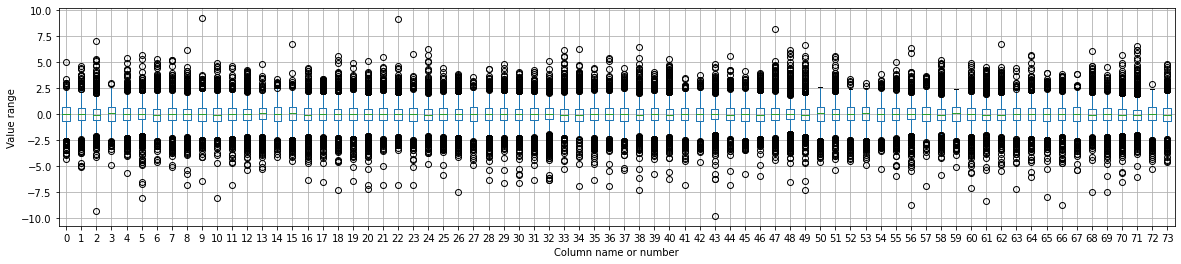

In [12]:
fig,axes = plt.subplots(figsize=(20,4))
scaledgenes.boxplot(ax=axes);
axes.set_xlabel('Column name or number')
axes.set_ylabel('Value range');

# KMeans clustering

In [13]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)

In [14]:
twodproj = skl.manifold.TSNE(n_components=2, n_iter=5000, random_state=np.random.seed(5)).fit_transform(scaledgenes)
twodproj.shape

(2602, 2)

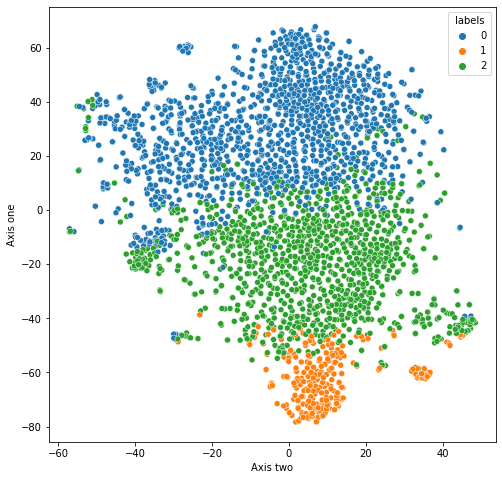

In [15]:
df_tsne = pd.DataFrame()
df_tsne['Axis one'] = twodproj[:,0]
df_tsne['Axis two'] = twodproj[:,1]
df_tsne['labels'] = geneclustersKM.labels_

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="Axis two", y="Axis one",
    hue='labels',
    data=df_tsne,
    legend="full",
    palette=sns.color_palette("tab10",3),
    alpha=1.0
);

In [16]:
def edistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=1))
def calcICVar(X, labels, model):
  n_clusters = np.unique(labels).shape[0] # for every cluster, i.e. for every different label
  print(n_clusters)
  icv = np.zeros(n_clusters) #create a container for the intraclustervariance
  for i in range(n_clusters):
    icv[i] = (edistance(model.cluster_centers_[i], X[labels==i])**2).sum()
    #print(icv)
  return(icv.sum())

In [17]:
nclusters = np.arange(1,11)
inertia = np.zeros(len(nclusters))
variance = np.zeros(len(nclusters))
for i in range(len(nclusters)):
  KM_model = cluster.KMeans(n_clusters=nclusters[i]).fit(scaledgenes)
  inertia[i] = KM_model.inertia_
  variance[i] = calcICVar(scaledgenes.to_numpy(), KM_model.labels_, KM_model)


1
2
3
4
5
6
7
8
9
10


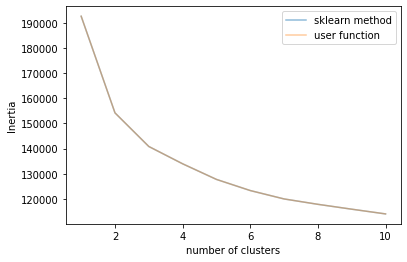

In [18]:
plt.plot(nclusters, inertia, label='sklearn method', alpha=0.5)
plt.plot(nclusters, variance, label='user function', alpha=0.4)
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.legend();

## Scaled Inertia, [reference](https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c)

In [19]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = cluster.KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

In [20]:
inertia_scaled = []
for i in range(1,len(nclusters)+1):
  inertia_scaled.append(kMeansRes(scaledgenes.to_numpy(), i, alpha_k=0.03))


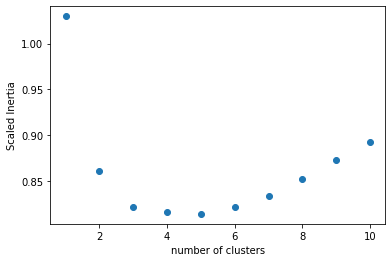

In [21]:
plt.plot(nclusters, inertia_scaled, marker='o', linestyle='')
plt.xlabel('number of clusters')
plt.ylabel('Scaled Inertia');

Based on above figure, 5 clusters looks optimum for this data set, as scaled inertia is minimum at 5.

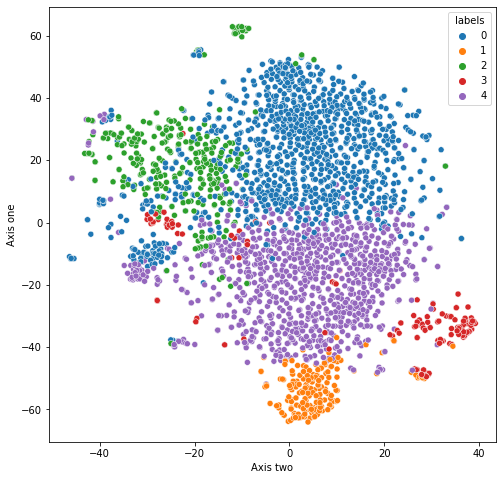

In [22]:
geneclustersKM = cluster.KMeans(n_clusters=5).fit(scaledgenes)
twodproj = skl.manifold.TSNE(n_components=2, random_state=np.random.seed(5)).fit_transform(scaledgenes)

df_tsne = pd.DataFrame()
df_tsne['Axis one'] = twodproj[:,0]
df_tsne['Axis two'] = twodproj[:,1]
df_tsne['labels'] = geneclustersKM.labels_

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="Axis two", y="Axis one",
    hue='labels',
    data=df_tsne,
    palette=sns.color_palette("tab10",5),
    legend="full",
    alpha=1.0
);

# DBScan Clustering

## Distance matrix

In [23]:
distance_matrix = skl.metrics.pairwise_distances(scaledgenes.to_numpy())

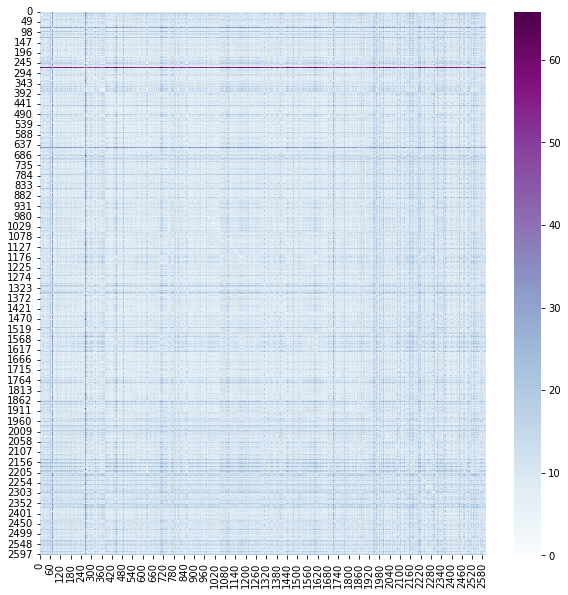

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(distance_matrix, cmap='BuPu')



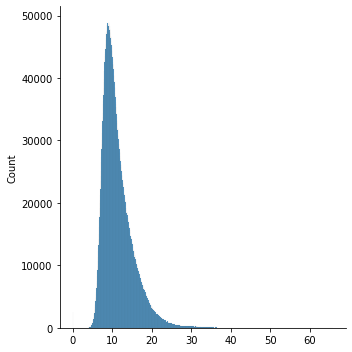

In [25]:
sns.displot(distance_matrix.flatten())

In [26]:
np.mean(distance_matrix.flatten())

11.467567141798792

## DBSCAN parameters eps and min_samples [reference](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)

In [27]:
eps = 11    # slighlty less than the mean distance. Use Knearlest number also and come to the same eps number around 11
min_samples = 2*scaledgenes.shape[1]   # two times the dimension of your data
clustering = skl.cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(scaledgenes.to_numpy())
labels = clustering.labels_   # create labels for clustere
df['labels'] = labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("number of clusters present in data = {}".format(n_clusters))
print("number of outliers present in data = {}".format(n_noise))

number of clusters present in data = 1
number of outliers present in data = 33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
neighbors = skl.neighbors.NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scaledgenes)
distances, indices = neighbors_fit.kneighbors(scaledgenes)

(2500.0, 2700.0)

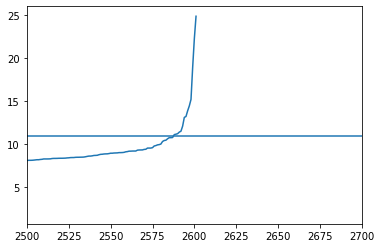

In [47]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(11)
plt.xlim(2500,2700)

points sorted by distance to the 148 (2*dimension) samples. Point of maximum curvature gives the optimum value of eps, which is rouhly 11 in this case. We have already infererred the same value from mean of the distance distributions.

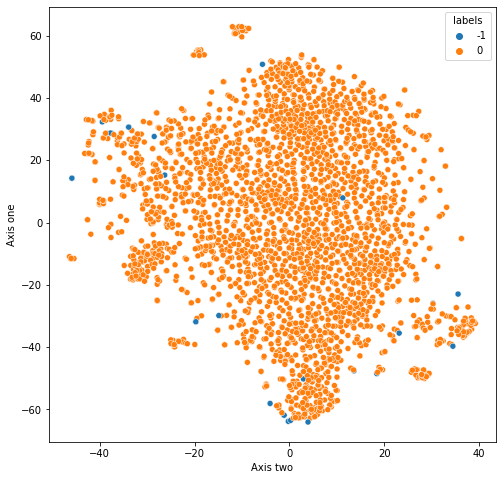

In [45]:
df_tsne = pd.DataFrame()
df_tsne['Axis one'] = twodproj[:,0]
df_tsne['Axis two'] = twodproj[:,1]
df_tsne['labels'] = labels

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="Axis two", y="Axis one",
    hue='labels',
    data=df_tsne,
    legend="full",
    palette=sns.color_palette("tab10",2),
    alpha=1.0
);

Number of cluster founds in DBScan is only 1 (orange points) and there are about 33 outliers (blue points). Ouliers or noise is 33/2600 = just 1%. Not a very significant number.